In [287]:
import pandas as pd
import numpy as np
from sklearn.metrics import mutual_info_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [4]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

383.38s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


--2025-10-15 14:51:43--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv’

course_lead_scoring 100%[===================>]  78.98K  --.-KB/s    in 0.001s  

2025-10-15 14:51:43 (78.3 MB/s) - ‘course_lead_scoring.csv’ saved [80876/80876]



In [288]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,NaN,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NaN,5,71016.0,self_employed,north_america,0,0.25,1


### Data Preparation

In [289]:
print(df.isnull().sum())
print("\nYes there are missing values.")

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

Yes there are missing values.


In [290]:
df.annual_income = df.annual_income.fillna(0.0)
df = df.fillna('NA')
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,0.0,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NA,5,71016.0,self_employed,north_america,0,0.25,1


### Question 1

In [291]:
df.industry.mode()[0]

'retail'

### Question 2

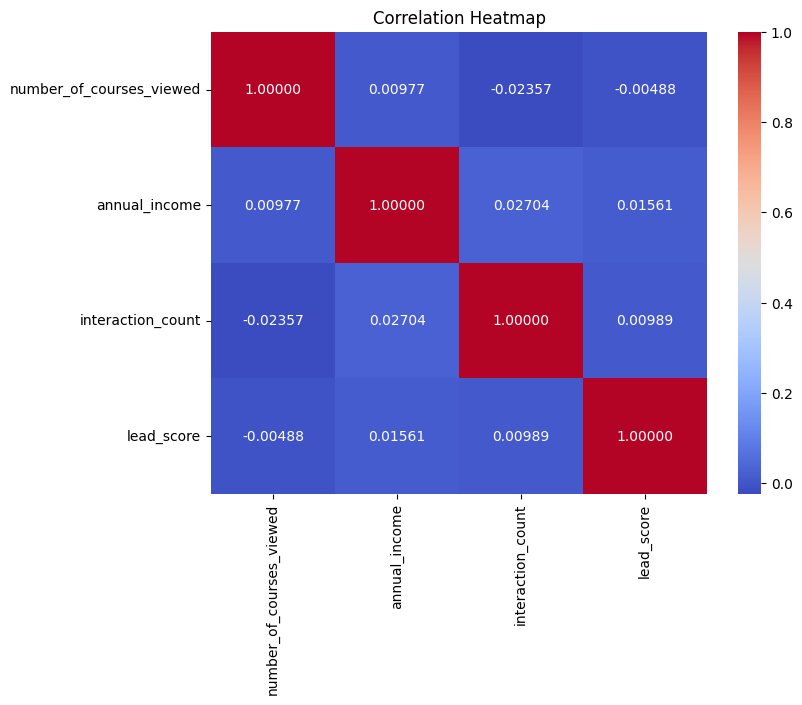

In [292]:
numerical = list(df.dtypes[df.dtypes != 'object'].index)
numerical.remove('converted')
corr_matrix = df[numerical].corr()
corr_matrix

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".5f", linewidths=0.0005)
plt.title("Correlation Heatmap")
plt.show()

### Split the Data

In [293]:
df_full_train, df_test = train_test_split(df, test_size = 0.2,  random_state = 42)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 42)

In [294]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [295]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)


In [296]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

### Question 3

In [297]:
def mutual_info_converted_score(feature):
    return mutual_info_score(feature, df_full_train.converted)

In [298]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)

mi = df_full_train[categorical].apply(mutual_info_converted_score)
mi = round(mi, 2)
mi.sort_values(ascending=False)

lead_source          0.03
industry             0.01
employment_status    0.01
location             0.00
dtype: float64

### Question 4

In [299]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [300]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]
converted_decision = (y_pred >= 0.5)
original_accuracy = (y_val == converted_decision).mean().round(2)
print("Accuracy with =", original_accuracy)

Accuracy with = 0.7


### Question 5

In [301]:
def model_accuracy(feature):
    features = categorical + numerical
    features.remove(feature)
    
    dv = DictVectorizer(sparse=False)

    train_dict = df_train[features].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    
    val_dict = df_val[features].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict_proba(X_val)[:, 1]
    converted_decision = (y_pred >= 0.5)
    accuracy = (y_val == converted_decision).mean()

    return accuracy

In [302]:
accuracy_diff = set()
features = categorical + numerical

print('accuracy difference:')
for feature in features:
    accuracy = model_accuracy(feature)
    print(feature, '\b:', accuracy - original_accuracy)

accuracy difference:
lead_source: 0.0030716723549488734
industry: -0.0003412969283276279
employment_status: -0.003754266211604018
location: 0.009897610921501765
number_of_courses_viewed: -0.14368600682593857
annual_income: 0.1532423208191127
interaction_count: -0.14368600682593857
lead_score: 0.006484641638225264


### Question 6

In [303]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

for c in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict_proba(X_val)[:, 1]
    converted_decision = (y_pred >= 0.5)
    original_accuracy = (y_val == converted_decision).mean().round(3)
    print(f"Accuracy with {c} =", original_accuracy)

Accuracy with 0.01 = 0.7
Accuracy with 0.1 = 0.7
Accuracy with 1 = 0.7
Accuracy with 10 = 0.7
Accuracy with 100 = 0.7
